Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [9]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';', stringsAsFactors = T)
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [20]:
library(tidyverse)

df_airbnb <- airbnb %>% 
select(c('City', 'Room.Type', 'Neighbourhood', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 
         'Square.Feet', 'Guests.Included', 'Extra.People',
               'Review.Scores.Rating', 'Latitude', 'Longitude'))

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [23]:
df_madrid<-df_airbnb %>% 
    filter(Room.Type == "Entire home/apt" & City == 'Madrid' & Neighbourhood!='') %>% 
    select(-c("Room.Type", 'City')) %>%
    droplevels()

set.seed(123)

In [24]:
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People   
 Min.   : 1.000   Min.   : 10.00   Min.   : 1.000   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.00  
 Mean   : 2.393   Mean   : 88.74   Mean   : 1.952   Mean   :  8.79  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.00  
 Max.   :16.000   Max.   :

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [25]:
df_airbnb <- airbnb %>% 
select(c('City', 'Room.Type', 'Neighbourhood', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Square.Feet',
                'Guests.Included', 'Extra.People', 'Review.Scores.Rating', 'Latitude', 'Longitude')) %>% 
mutate(Square.Meters = Square.Feet*0.092903) %>%
select(-c("Square.Feet"))

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [27]:
paste0("El porcentaje de NA en Square.Meters es: ", sum(is.na(df_madrid$Square.Meters)/nrow(df_madrid))*100, "%")

[1] "El porcentaje de NA en Square.Meters es: 93.8046777361185%"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [28]:
paste0("El porcentaje de los apartamentos que tienen un valor de metros cuadrados diferente de NA es: ", sum(df_madrid$Square.Meters == 0,na.rm = T)/sum(!is.na(df_madrid$Square.Meters))*100, "%")

[1] "El porcentaje de los apartamentos que tienen un valor de metros cuadrados diferente de NA es: 36.8876080691643%"

Reemplazar todos los 0m^2 por NA 

In [31]:
df_madrid<-df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters == 0, NA, Square.Meters))
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People   
 Min.   : 1.000   Min.   : 10.00   Min.   : 1.000   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.00  
 Mean   : 2.393   Mean   : 88.74   Mean   : 1.952   Mean   :  8.79  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.00  
 Max.   :16.000   Max.   :

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más, además crearemos una variable sintética nueva basada en la similitud entre barrios.

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [33]:
 df_madrid<-df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters<20, NA, Square.Meters))

Existen varios Barrios que todas sus entradas son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [35]:
neighbours_all <- df_madrid %>% group_by(Neighbourhood) %>% 
summarise(num_na=sum(is.na(Square.Meters))/length(Square.Meters)) %>% 
filter(num_na == 1) %>% select(Neighbourhood)
df_madrid <- df_madrid[!df_madrid$Neighbourhood %in% neighbours_all$Neighbourhood,]
paste("Quedan", length(unique(df_madrid$Neighbourhood)),"barrios en el dataset")

[1] "Quedan 38 barrios en el dataset"

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




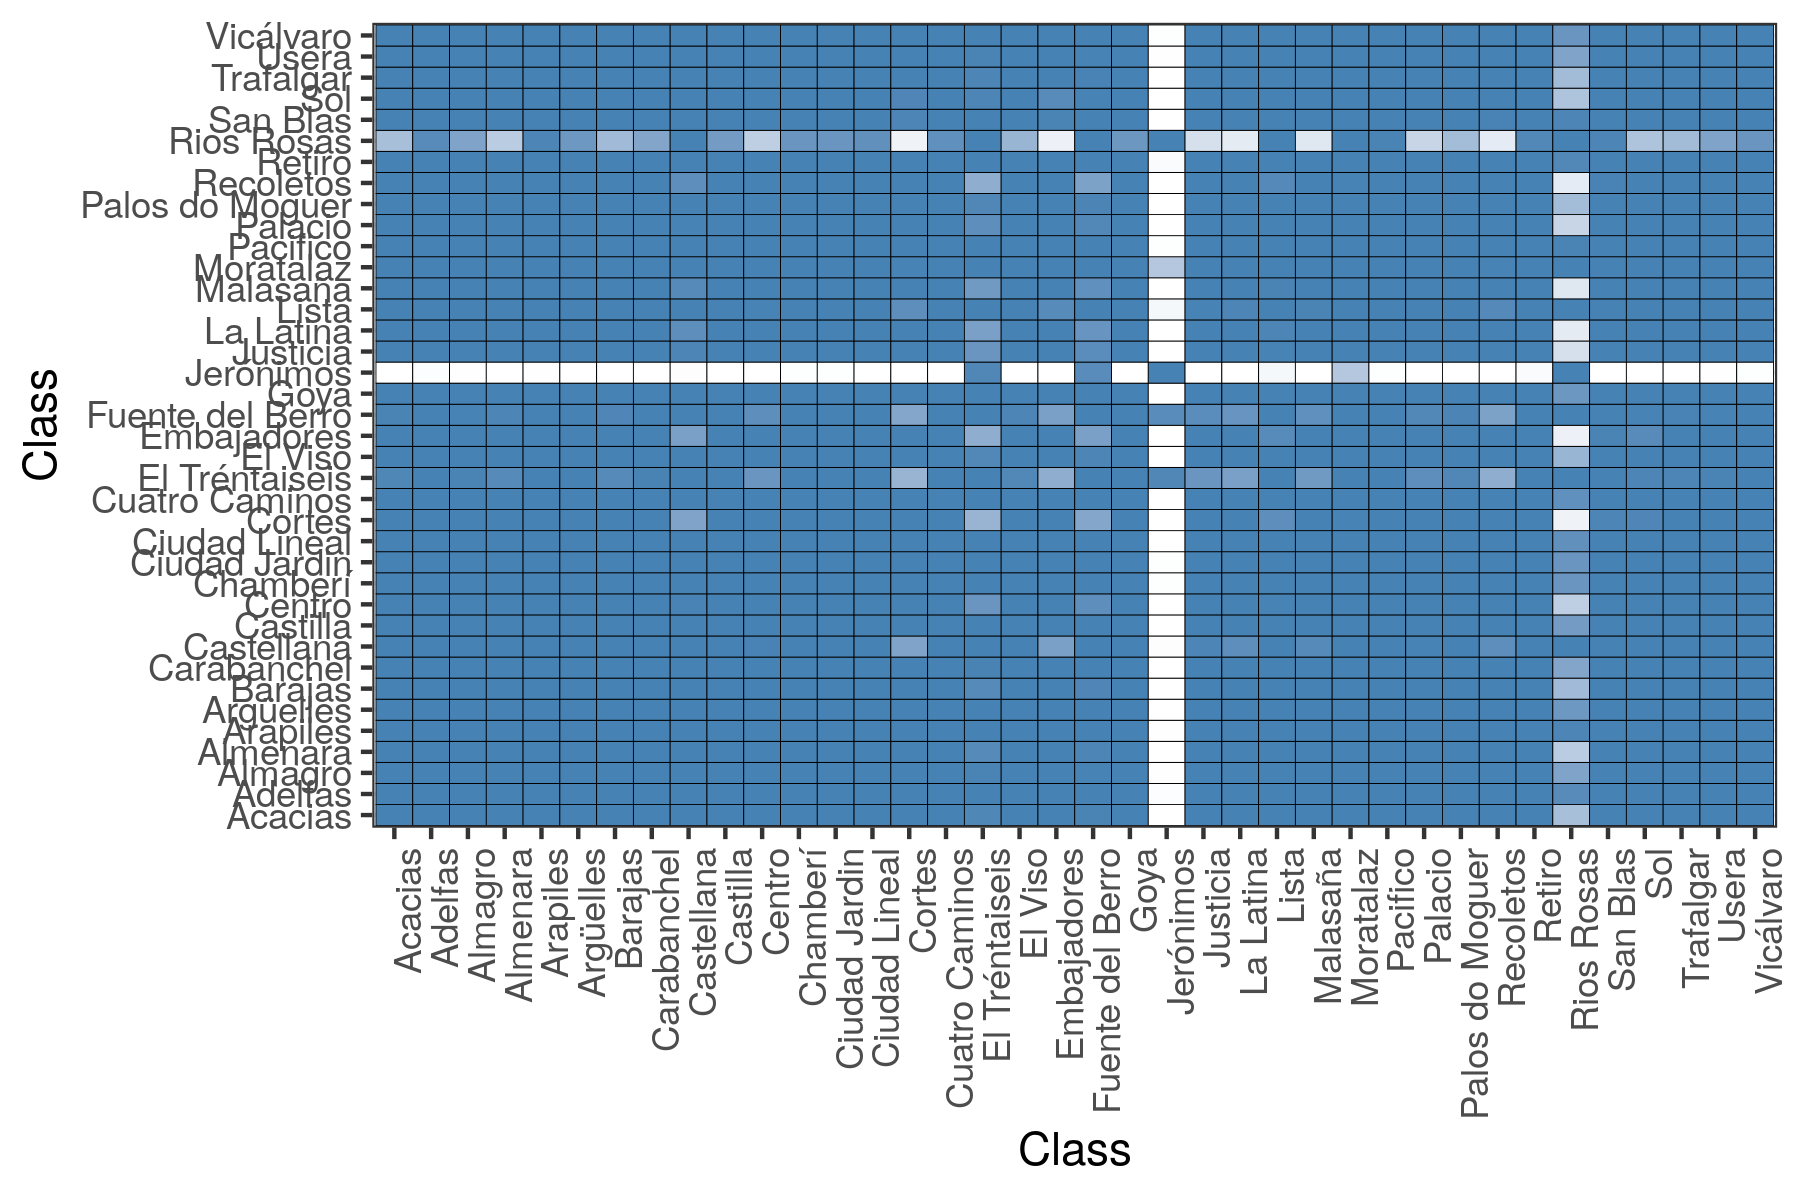

In [36]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [45]:
f_dist <- as.dist(1-resm)
hc <- hclust(f_dist,method = "complete")
hcdend <- as.dendrogram(hc)

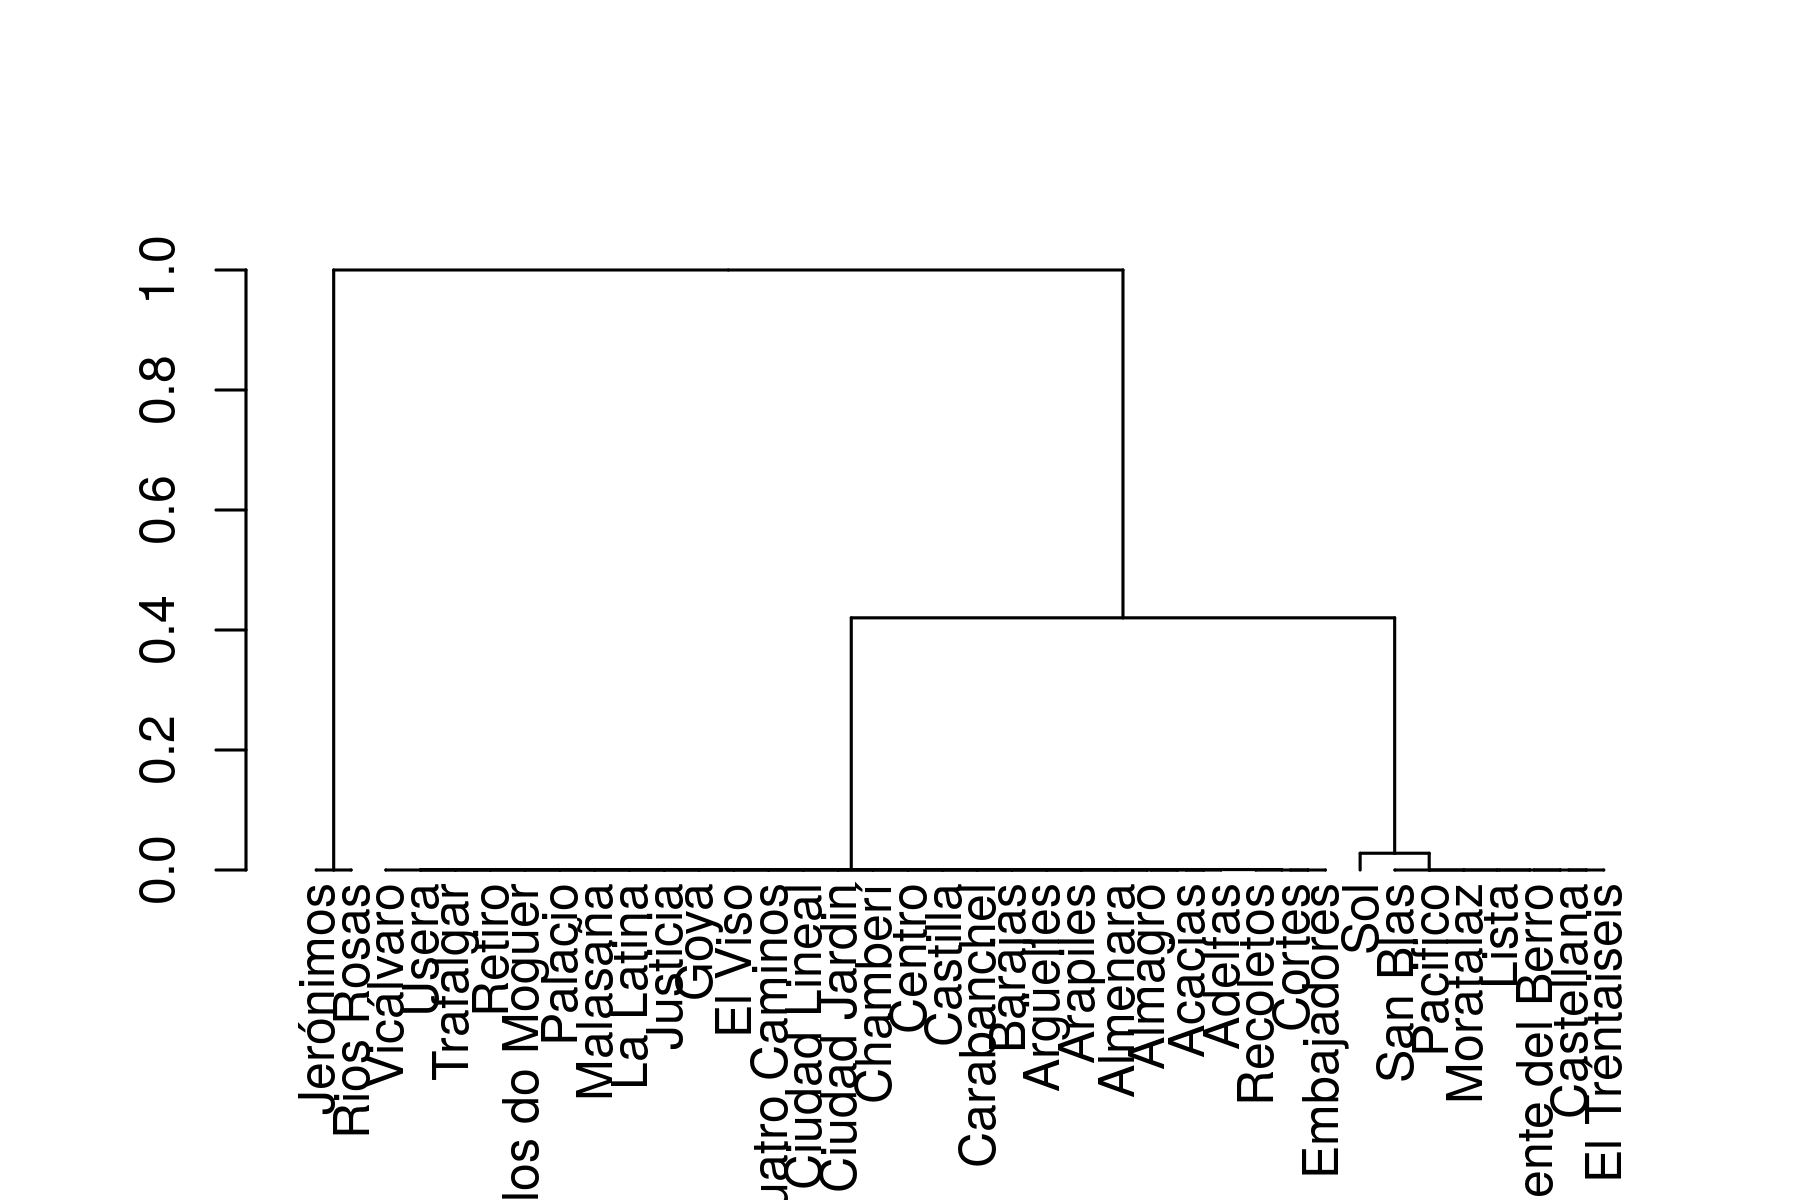

In [46]:
plot(hcdend)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

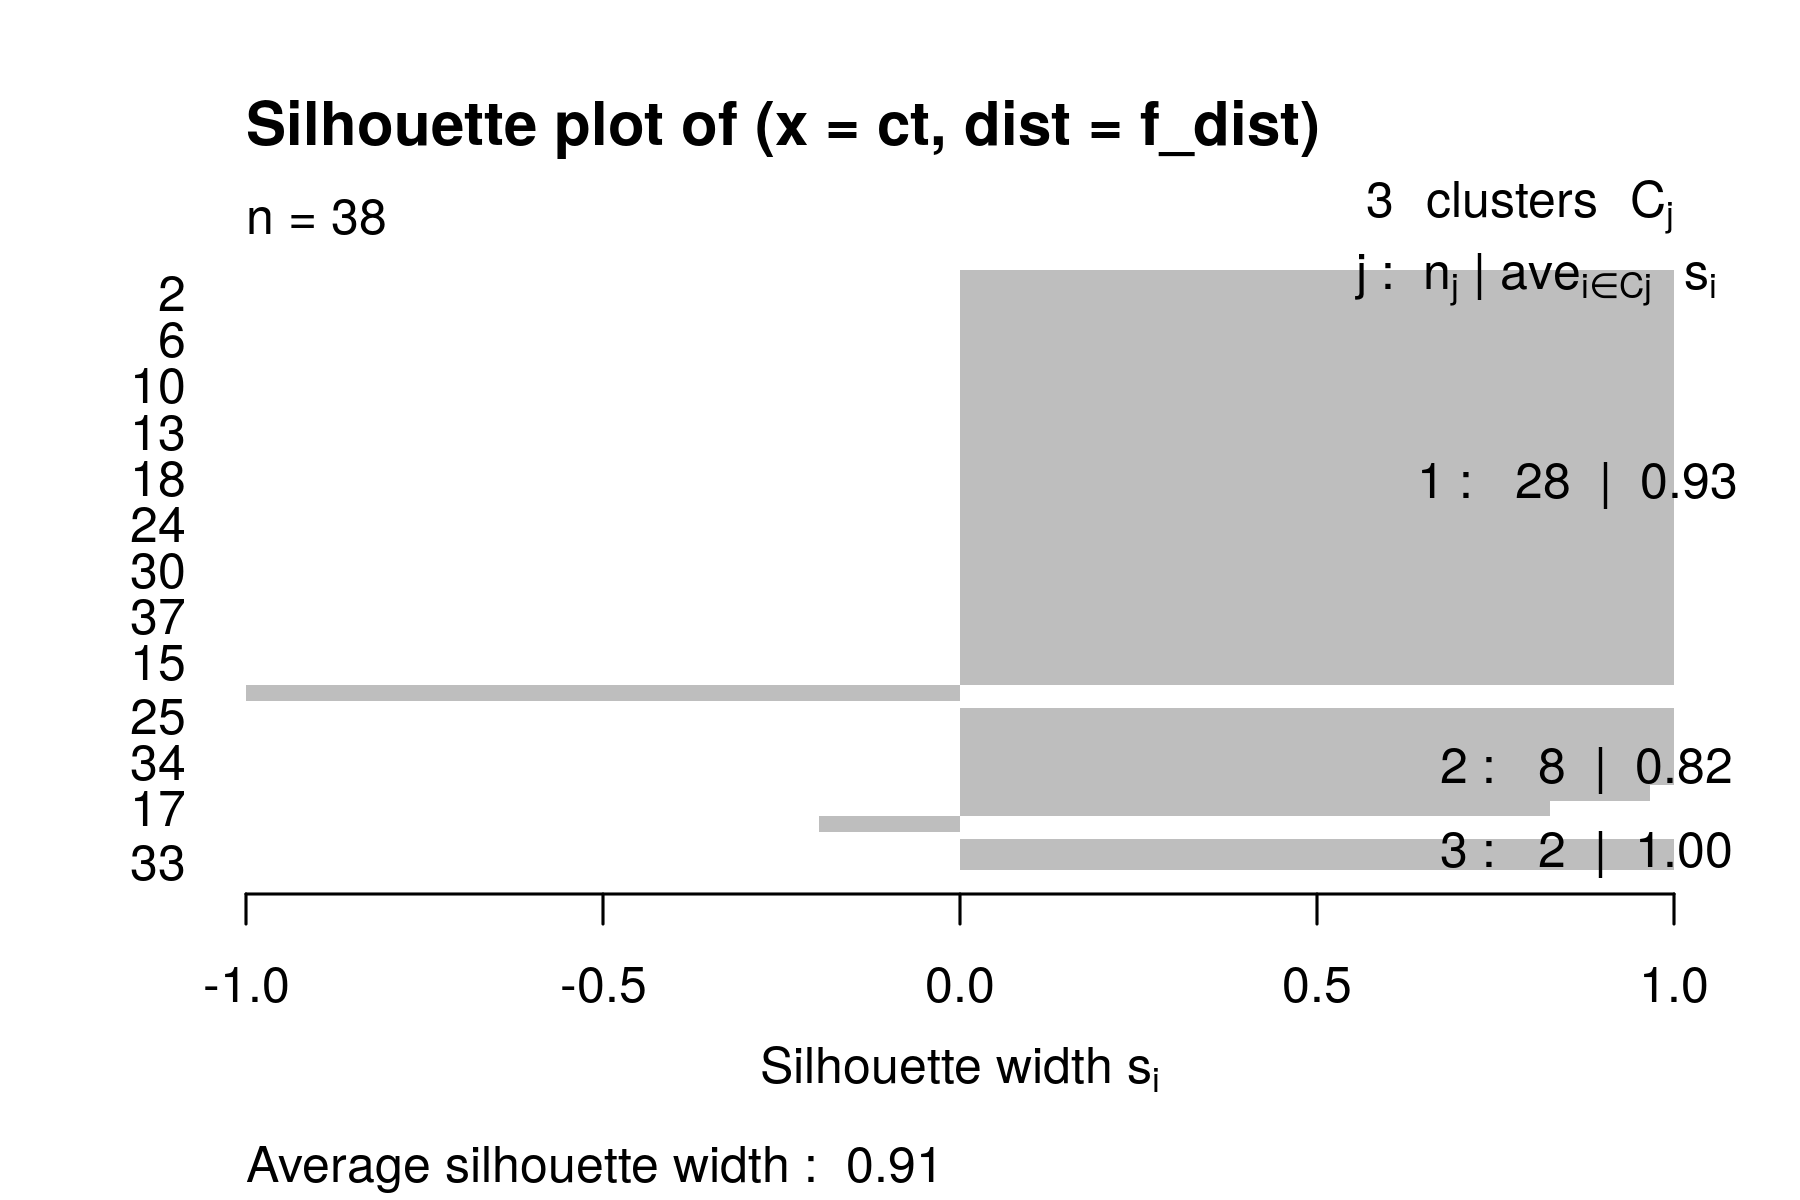

In [44]:
ct <- cutree(hc, h = 0.2)
library(cluster)
sil <- silhouette(ct, f_dist)
plot(sil, border=NA)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [41]:
df_barrios <- data.frame(names = names(ct), neighb_id=paste0("Neighb_id_", ct))
head(df_barrios)

,names,neighb_id
,<fct>,<fct>
1,Acacias,Neighb_id_1
2,Adelfas,Neighb_id_1
3,Almagro,Neighb_id_1
4,Almenara,Neighb_id_1
5,Arapiles,Neighb_id_1
6,Argüelles,Neighb_id_1


In [49]:
df_madrid_id <- df_madrid %>% inner_join(df_barrios, by=c("Neighbourhood"='names')) %>% filter(!is.na(Square.Meters))
dim(df_madrid_id) 
head(df_madrid_id)

Warning message:
“Column `Neighbourhood`/`names` joining factors with different levels, coercing to character vector”


[1] 174  13

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,La Latina,6,2.0,2,2,72,2,20,90,40.41206,-3.709149,54.99858,Neighb_id_1
2,Acacias,4,1.0,1,2,60,2,15,98,40.40513,-3.707726,49.98181,Neighb_id_1
3,Malasaña,4,1.0,2,3,105,1,0,97,40.42900,-3.703498,69.95596,Neighb_id_1
4,Recoletos,2,1.0,0,2,61,1,0,92,40.42800,-3.686409,30.00767,Neighb_id_1
5,Malasaña,8,2.0,3,4,120,6,0,83,40.42198,-3.705419,109.99715,Neighb_id_1
6,Argüelles,4,1.5,2,2,95,2,15,89,40.42920,-3.717775,96.99073,Neighb_id_1


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [50]:
set.seed(12)
sample_madrid <- sample(1:nrow(df_madrid_id),nrow(df_madrid_id)*0.8)
df_madrid_id_train <- df_madrid_id[sample_madrid,]
df_madrid_id_test <- df_madrid_id[-sample_madrid,]

In [51]:
model<-lm(formula=Square.Meters~neighb_id+neighb_id+Price+Bedrooms, df_madrid_id_train)
summary(model)


Call:
lm(formula = Square.Meters ~ neighb_id + neighb_id + Price + 
    Bedrooms, data = df_madrid_id_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-111.671  -12.961   -1.369    9.346  174.285 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           15.38924    4.55911   3.375 0.000964 ***
neighb_idNeighb_id_2   7.84994    5.67200   1.384 0.168666    
neighb_idNeighb_id_3 126.08435   17.05610   7.392 1.40e-11 ***
Price                  0.10797    0.03554   3.038 0.002865 ** 
Bedrooms              24.97222    2.71159   9.209 5.88e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.76 on 134 degrees of freedom
Multiple R-squared:  0.694,	Adjusted R-squared:  0.6849 
F-statistic: 75.98 on 4 and 134 DF,  p-value: < 2.2e-16


Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

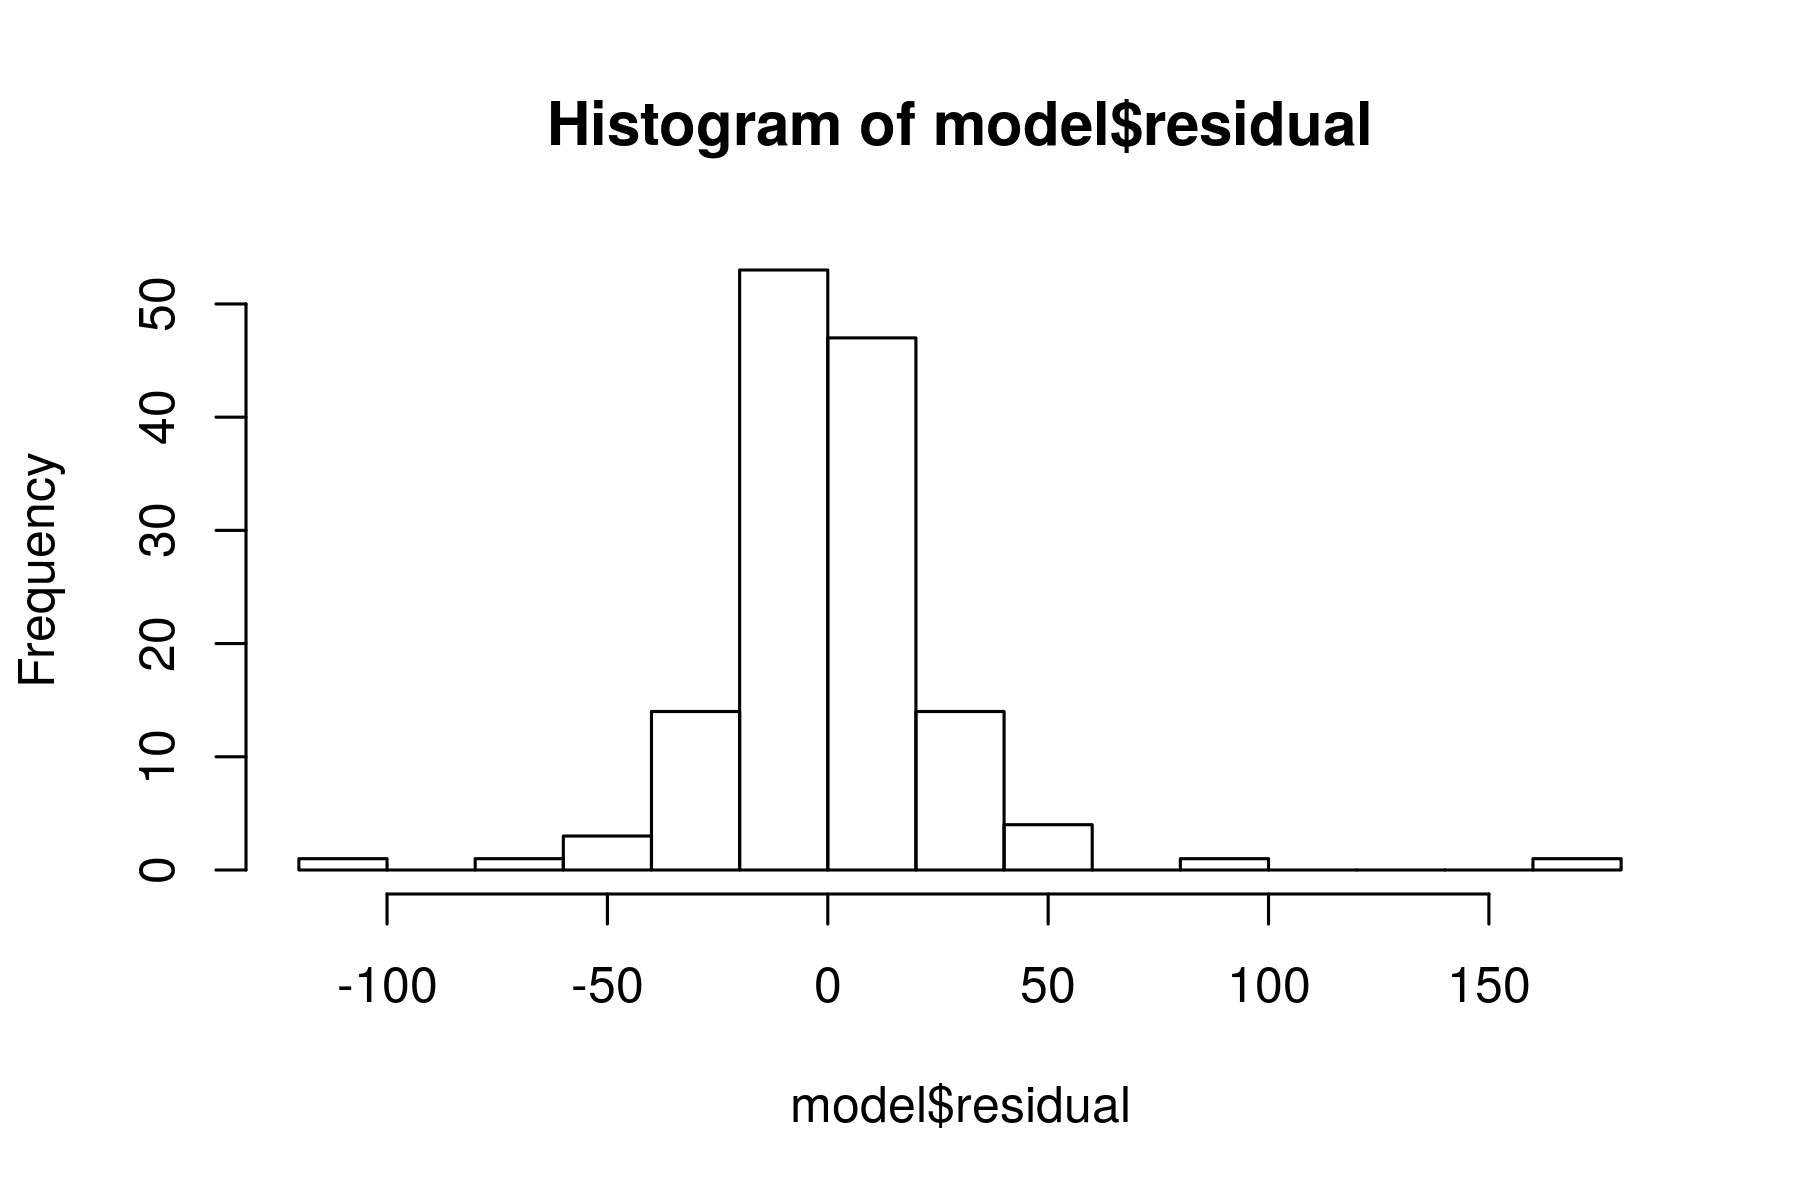

In [52]:
 hist(model$residual, breaks=20)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [54]:
neighbour_sol <- df_barrios %>% filter(names == "Sol") %>% select(neighb_id)
paste0("El id de barrio es: ",neighbour_sol)

df_appartment <- data.frame(neighb_id = neighbour_sol, Bedrooms = 3, Price = 80, Accommodates = 6)

pred_m2<-predict(model, df_appartment)
paste("Los metros cuadrados son:", round(pred_m2))

[1] "El id de barrio es: 2"

[1] "Los metros cuadrados son: 107"

In [55]:
coefficients <- coefficients(model)
coefficients_bedroom_sol <- coefficients['Bedrooms']

paste("En media cada habitación aumenta el tamaño del apartemos en:", round(coefficients_bedroom_sol, 2), "m^2")

[1] "En media cada habitación aumenta el tamaño del apartemos en: 24.97 m^2"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [56]:
df_madrid_all <- df_madrid %>% inner_join(df_barrios, by = c("Neighbourhood"='names')) 

df_madrid_all$Square.Meters[is.na(df_madrid_all$Square.Meters)] <- round(predict(model, df_madrid_all[is.na(df_madrid_all$Square.Meters),]))

head(df_madrid_all)

Warning message:
“Column `Neighbourhood`/`names` joining factors with different levels, coercing to character vector”


,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,Embajadores,2,1,1,2,50,1,20,93,40.41126,-3.697305,46,Neighb_id_1
2,Embajadores,5,1,2,4,95,4,0,97,40.41256,-3.701155,76,Neighb_id_1
3,La Latina,4,1,1,2,69,2,18,91,40.40791,-3.705095,48,Neighb_id_1
4,Embajadores,4,1,1,2,57,2,8,98,40.41162,-3.703281,47,Neighb_id_1
5,La Latina,2,1,1,1,59,1,0,95,40.40734,-3.707019,47,Neighb_id_1
6,La Latina,14,2,3,14,120,2,18,92,40.40908,-3.704744,103,Neighb_id_1


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [57]:
df_madrid_pca <- na.omit(df_madrid_all[,c("Accommodates", "Bathrooms", "Bedrooms", "Latitude", "Longitude", "Beds", "Price", "Review.Scores.Rating", "Square.Meters","neighb_id")])

pca_df<-prcomp(df_madrid_pca %>% select(-neighb_id), center = TRUE, scale. = TRUE)

In [58]:
summary(df_madrid_pca)

  Accommodates      Bathrooms       Bedrooms        Latitude    
 Min.   : 1.000   Min.   :0.00   Min.   :0.000   Min.   :40.36  
 1st Qu.: 3.000   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:40.41  
 Median : 4.000   Median :1.00   Median :1.000   Median :40.42  
 Mean   : 4.127   Mean   :1.24   Mean   :1.417   Mean   :40.42  
 3rd Qu.: 5.000   3rd Qu.:1.00   3rd Qu.:2.000   3rd Qu.:40.42  
 Max.   :16.000   Max.   :6.00   Max.   :8.000   Max.   :40.48  
   Longitude           Beds            Price        Review.Scores.Rating
 Min.   :-3.761   Min.   : 1.000   Min.   : 18.00   Min.   : 20.00      
 1st Qu.:-3.707   1st Qu.: 1.000   1st Qu.: 57.00   1st Qu.: 88.00      
 Median :-3.702   Median : 2.000   Median : 74.00   Median : 93.00      
 Mean   :-3.700   Mean   : 2.384   Mean   : 87.17   Mean   : 91.44      
 3rd Qu.:-3.698   3rd Qu.: 3.000   3rd Qu.: 99.00   3rd Qu.: 97.00      
 Max.   :-3.576   Max.   :16.000   Max.   :800.00   Max.   :100.00      
 Square.Meters          neighb_id 

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?